# Telecom Customer Churn Analysis & Prediction

## Objective
The goal of this project is to analyze customer behavior and build a machine learning model to predict customer churn.

### Business Problem
Customer churn leads to revenue loss. By predicting which customers are likely to leave, telecom companies can take proactive retention measures.

### Project Steps
1. Data loading and cleaning
2. Exploratory Data Analysis (EDA)
3. Feature engineering
4. Model training and evaluation
5. Business insights


In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
import os

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

sns.set_style("whitegrid")


In [35]:
df = pd.read_csv("../data/telco_churn.csv")
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [36]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [37]:
import os

os.makedirs("../outputs/plots", exist_ok=True)


In [38]:
# Remove customer ID (not useful for prediction)
df.drop("customerID", axis=1, inplace=True)

# Convert TotalCharges to numeric
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# Fill missing values
df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)

df.isnull().sum()


C:\Users\sbcni\AppData\Local\Temp\ipykernel_14716\1578685764.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)


gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

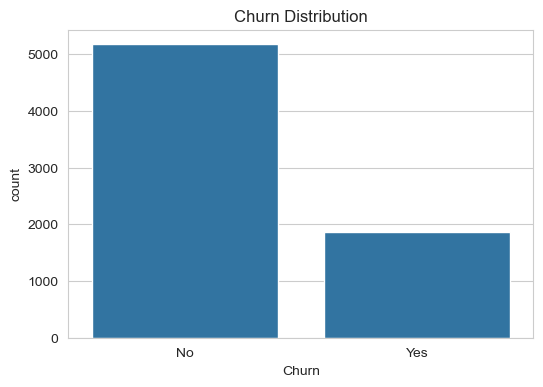

In [39]:
plt.figure(figsize=(6,4))
sns.countplot(x="Churn", data=df)
plt.title("Churn Distribution")

plt.savefig("../outputs/plots/churn_distribution.png", dpi=300, bbox_inches="tight")
plt.show()


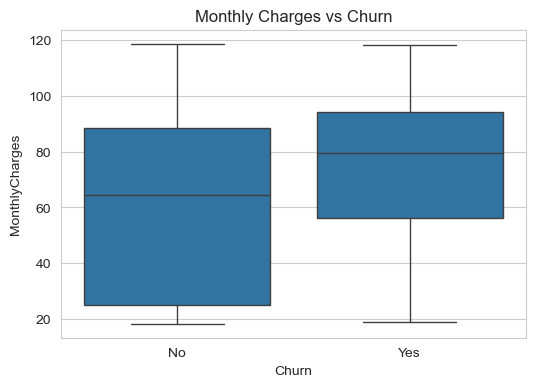

In [40]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Churn", y="MonthlyCharges", data=df)
plt.title("Monthly Charges vs Churn")

plt.savefig("../outputs/plots/monthly_charges_vs_churn.png", dpi=300, bbox_inches="tight")
plt.show()



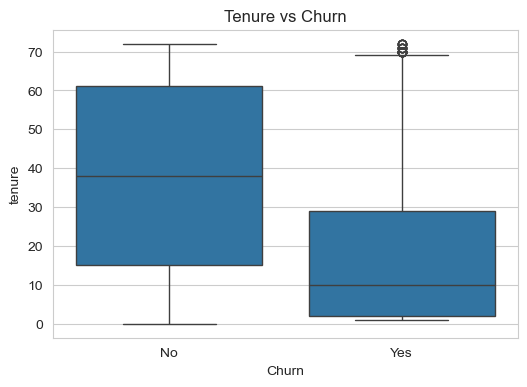

In [41]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Churn", y="tenure", data=df)
plt.title("Tenure vs Churn")

plt.savefig("../outputs/plots/tenure_vs_churn.png", dpi=300, bbox_inches="tight")
plt.show()



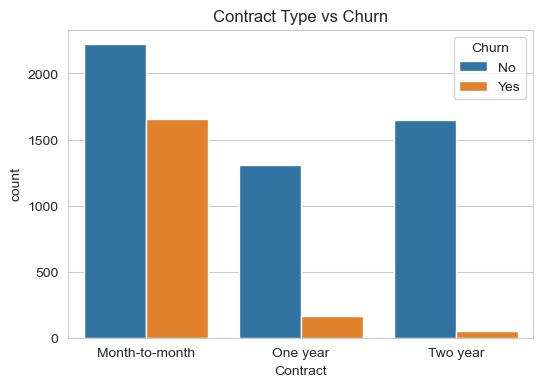

In [42]:
plt.figure(figsize=(6,4))
sns.countplot(x="Contract", hue="Churn", data=df)
plt.title("Contract Type vs Churn")

plt.savefig("../outputs/plots/churn_by_contract.png", dpi=300, bbox_inches="tight")
plt.show()


In [43]:
df_encoded = pd.get_dummies(df, drop_first=True)

X = df_encoded.drop("Churn_Yes", axis=1)
y = df_encoded["Churn_Yes"]

print("Feature count:", X.shape[1])


Feature count: 30


In [44]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [45]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [46]:
preds = model.predict(X_test)

accuracy = accuracy_score(y_test, preds)
precision = precision_score(y_test, preds)
recall = recall_score(y_test, preds)
f1 = f1_score(y_test, preds)

print("Accuracy:", round(accuracy, 4))
print("Precision:", round(precision, 4))
print("Recall:", round(recall, 4))
print("F1 Score:", round(f1, 4))


Accuracy: 0.7892
Precision: 0.6429
Recall: 0.4584
F1 Score: 0.5352


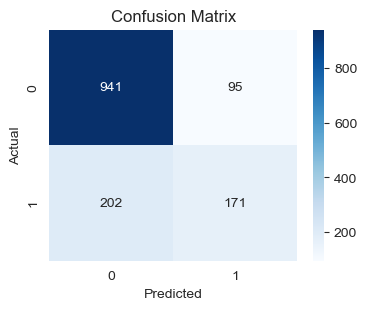

In [47]:
cm = confusion_matrix(y_test, preds)

plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [48]:
print(classification_report(y_test, preds))


              precision    recall  f1-score   support

       False       0.82      0.91      0.86      1036
        True       0.64      0.46      0.54       373

    accuracy                           0.79      1409
   macro avg       0.73      0.68      0.70      1409
weighted avg       0.78      0.79      0.78      1409



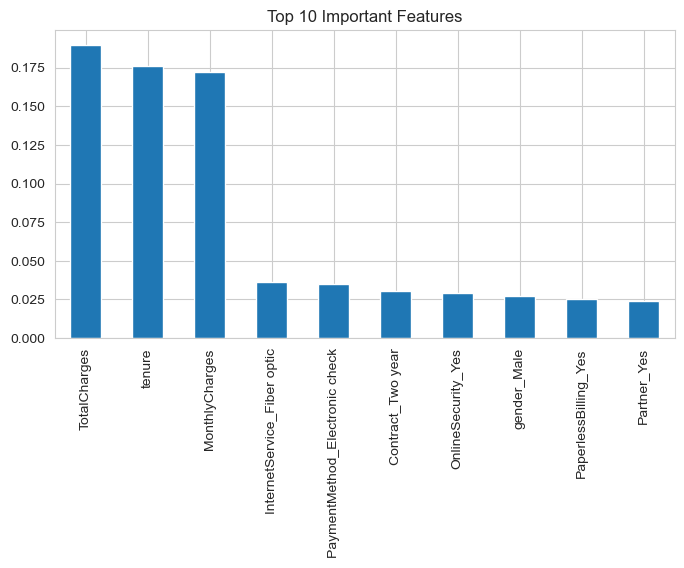

In [49]:
importances = pd.Series(model.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(10)

plt.figure(figsize=(8,4))
top_features.plot(kind="bar")
plt.title("Top 10 Important Features")

plt.savefig("../outputs/plots/feature_importance.png", dpi=300, bbox_inches="tight")
plt.show()


In [50]:
import os
import joblib

os.makedirs("../outputs/models", exist_ok=True)
joblib.dump(model, "../outputs/models/churn_model.pkl")
print("Model saved successfully.")



Model saved successfully.


## Key Business Insights

1. Customers with **month-to-month contracts** have the highest churn rate.
2. **Higher monthly charges** are associated with increased churn.
3. Customers with **shorter tenure** are more likely to churn.
4. Long-term contracts significantly reduce churn risk.
5. Customers without add-on services (security, support) churn more often.
6. Senior citizens show slightly higher churn rates.
7. Electronic check payment method is linked with higher churn.
8. Customers with fiber optic internet show higher churn.
9. Tenure is one of the strongest predictors of retention.
10. Bundled service offerings reduce churn probability.

### Business Recommendations
- Promote long-term contracts with incentives.
- Offer discounts for high monthly charge customers.
- Target new customers with retention campaigns.
- Bundle value-added services to reduce churn.
